<a href="https://colab.research.google.com/github/denizbaris/Data_Visualization_Python/blob/main/Assignment_1_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [3]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [8]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [13]:
kill[["gender"]].value_counts()

gender
M         2428
F          107
dtype: int64

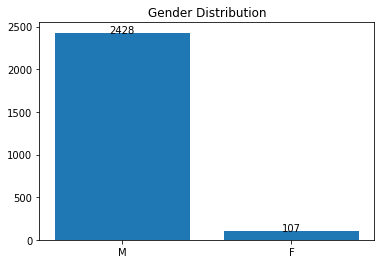

In [36]:
# with matplotlib
bars = kill.gender.value_counts()
position = kill.gender.unique()
plt.title('Gender Distribution')

#plt.text(x=0, y= bars[0], s = bars[0], ha='center') #the both solutions are possible. 
#plt.text(x=1, y= bars[1], s = bars[1], ha='center')

for i in range(len(bars)): # I prefer 'for' solution, because it's generate coding.
    plt.text(x=i, y= bars[i], s = bars[i], ha='center')

plt.bar(position, bars)
plt.show()

## 2: Plot 7 most common kill weapons

In [39]:
weapon = kill["armed"].value_counts().head(7) 
weapon

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

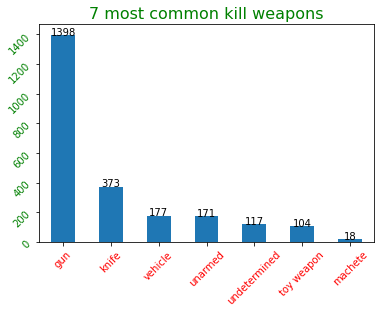

In [44]:
# with matplotlib
weapon.plot(kind = 'bar')
plt.title('7 most common kill weapons', color = 'g', fontsize = 16)
for i in range(len(weapon)):
    plt.text(x=i, y= weapon[i], s = weapon[i], ha='center')
plt.xticks(rotation = 45, color = 'r' )
plt.yticks(rotation = 45, color = 'g' )
plt.show()


## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [45]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [46]:
kill['age_cat'] = kill['age'].apply(lambda x: 'above25' if x > 25 else 'below25')


In [47]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [48]:
above = kill.age_cat.value_counts()
above

above25    1905
below25     630
Name: age_cat, dtype: int64

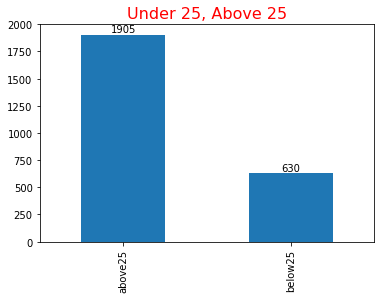

In [51]:
# with matplotlib
above.plot(kind = 'bar')
plt.title('Under 25, Above 25', color = 'r', fontsize = 16)
for i in range(len(above)):
    plt.text(x=i, y= above[i]+20, s = above[i], ha='center')
plt.show()


## 4: Plot number of killed poeple by race

In [53]:
race_killed = kill['race'].value_counts()
race_killed

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

<function matplotlib.pyplot.show>

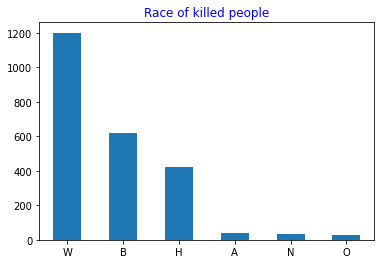

In [58]:
# with matplotlib
race_killed.plot.bar()
plt.title("Race of killed people", color = 'b')
plt.xticks(rotation = 0)
plt.show

## 5: Killed People According to Races (Pie Chart)

In [59]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [61]:
np.array(kill.race.value_counts().index)

array(['W', 'B', 'H', 'A', 'N', 'O'], dtype=object)

In [62]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [63]:
kill.dropna(inplace=True)

In [64]:
kill.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [65]:
a= kill.race.value_counts()
a

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [66]:
b = a.index
b

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [67]:
a.values

array([1168,  592,  401,   36,   29,   28])

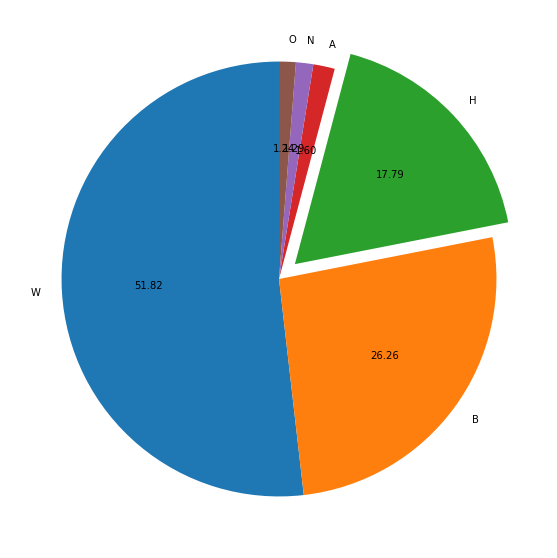

In [82]:
# matplotlib
e = (0,0,0.1,0,0,0)
plt.figure(figsize = (10,10))
plt.pie(a, labels= b, explode = e, autopct="%.2f", startangle=90)
plt.show()